In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv("C:/Users/HA/Desktop/projetML/data/final_data.csv")

In [71]:
df.head()

marque             modèle  Puissance fiscale  Année   price Carburant  \
0        Opel              Astra                  7   2009   74000    Diesel   
1    Mercedes           Classe c                  9   2016  330000    Diesel   
2       Volvo                S40                  6   2011  110000    Diesel   
3        Mini                One                  7   2016  145000   Essence   
4  Land-rover  Range rover sport                 12   2019  750000    Diesel   

   Kilométrage  
0     249000.0  
1     169000.0  
2     140000.0  
3      49000.0  
4      54000.0

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24321 entries, 0 to 24320
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             24321 non-null  object 
 1   modèle             24321 non-null  object 
 2   Puissance fiscale  24321 non-null  int64  
 3   Année              24321 non-null  int64  
 4   price              24321 non-null  int64  
 5   Carburant          24321 non-null  object 
 6   Kilométrage        24321 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [73]:
duplicates = df[df.duplicated()]
print(duplicates)

              marque    modèle  Puissance fiscale  Année   price Carburant  \
145         Mercedes  Classe c                 36   2011  240000   Essence   
215       Volkswagen     T-roc                  8   2023  348000    Diesel   
281       Volkswagen    Tiguan                  8   2020  315000    Diesel   
450             Ford    Fusion                  8   2017  165000    Diesel   
547             Fiat       500                  7   2022  150000   Essence   
...              ...       ...                ...    ...     ...       ...   
19239     Volkswagen    Golf 4                  8   2003   80000    Diesel   
19305        Citroen        C4                  6   2014  110000    Diesel   
19473  Mercedes-Benz  Classe C                  6   2022  325000    Diesel   
22146          Dacia    Duster                  8   2019  160000    Diesel   
23427           Opel     Astra                  6   2022  130000    Diesel   

       Kilométrage  
145       179000.0  
215        44000.0  


In [74]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(204)

In [75]:
df = df.drop_duplicates()

In [76]:
# Calculer les quartiles et l'IQR
Q1 = df["price"].quantile(0.25)  # Premier quartile (25%)
Q3 = df["price"].quantile(0.75)  # Troisième quartile (75%)
IQR = Q3 - Q1  # Interquartile Range

# Définir les limites pour détecter les outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Limite inférieure : {lower_limit}, Limite supérieure : {upper_limit}")

# Filtrer les données aberrantes
outliers = df[(df["price"] < lower_limit) | (df["price"] > upper_limit)]
print("Données aberrantes :")
print(outliers)


Limite inférieure : -99500.0, Limite supérieure : 392500.0
Données aberrantes :
              marque             modèle  Puissance fiscale  Année   price  \
4         Land-rover  Range rover sport                 12   2019  750000   
15             Lexus                 Ls                 20   2019  970000   
17           Renault              Autre                  7   2023  395000   
19               Bmw                 X5                  8   2023  840000   
23        Volkswagen             Tiguan                  8   2022  568000   
...              ...                ...                ...    ...     ...   
24190     Volkswagen             Tiguan                  9   2013  418000   
24222  Mercedes-Benz           Classe E                 12   2017  450000   
24238     Volkswagen             GOLF 8                  8   2005  460000   
24279           Audi       q5_sportback                  6   2017  680000   
24309     Land Rover              Velar                  6   2020  560000

In [77]:
#from scipy.stats import zscore
#df['zscore'] = zscore(df['price'])
#outliers = df[df['zscore'].abs() > 2.9]
#print(outliers)

In [78]:
df=df.drop(outliers.index)
df.head()

marque    modèle  Puissance fiscale  Année   price Carburant  Kilométrage
0      Opel     Astra                  7   2009   74000    Diesel     249000.0
1  Mercedes  Classe c                  9   2016  330000    Diesel     169000.0
2     Volvo       S40                  6   2011  110000    Diesel     140000.0
3      Mini       One                  7   2016  145000   Essence      49000.0
5      Ford    Fiesta                  6   2014  105000    Diesel     210000.0

In [79]:
df.to_csv('data_hadi.csv', index=False)

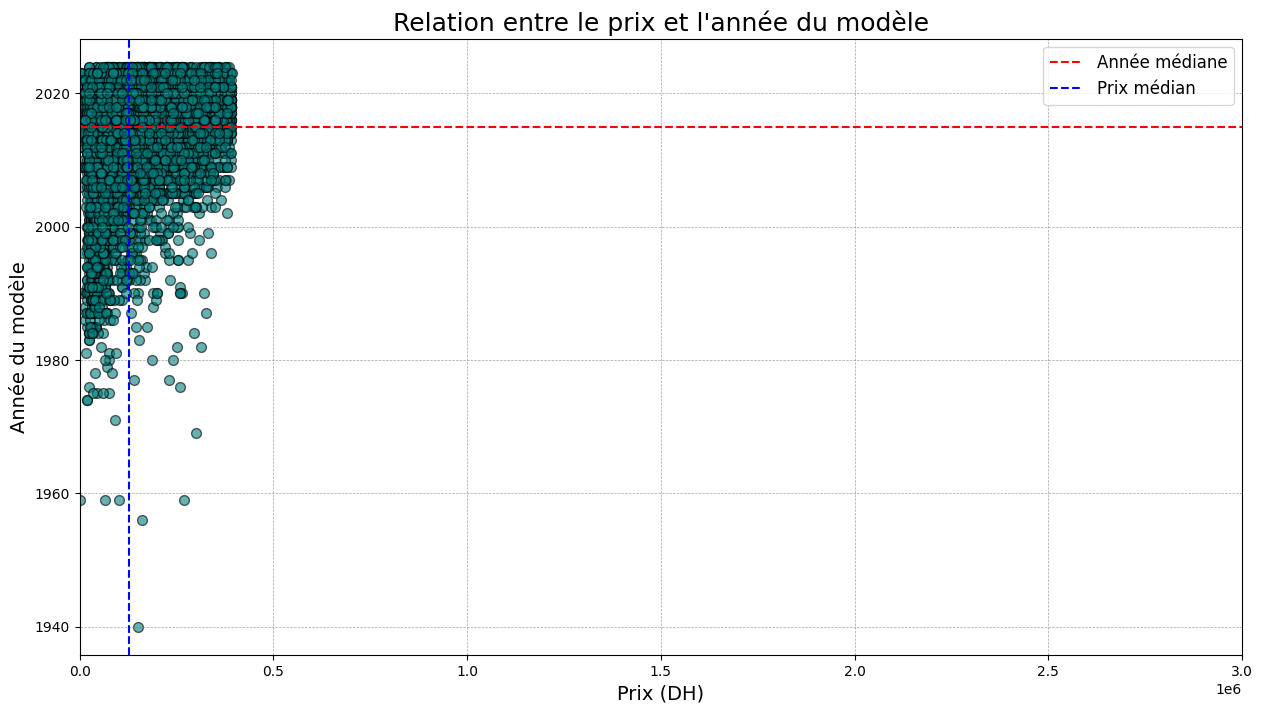

In [80]:
plt.figure(figsize=(15, 8))

# Scatter plot avec couleur et transparence
plt.scatter(df['price'], df['Année'], alpha=0.6, c='teal', edgecolor='k', s=50)

# Ajouter des labels et un titre
plt.xlabel("Prix (DH)", fontsize=14)
plt.ylabel("Année du modèle", fontsize=14)
plt.title("Relation entre le prix et l'année du modèle", fontsize=18)

# Définir les limites de l'axe des x pour afficher les prix entre 0 et 3 000 000
plt.xlim(0, 3000000)

# Ajouter une grille
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mettre en évidence les tendances (optionnel)
plt.axhline(y=df['Année'].median(), color='red', linestyle='--', label='Année médiane')
plt.axvline(x=df['price'].median(), color='blue', linestyle='--', label='Prix médian')

# Ajouter une légende
plt.legend(fontsize=12)

# Afficher le graphique
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_27596\1365995690.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Année', y='price', data=df, showfliers=False, palette="coolwarm")


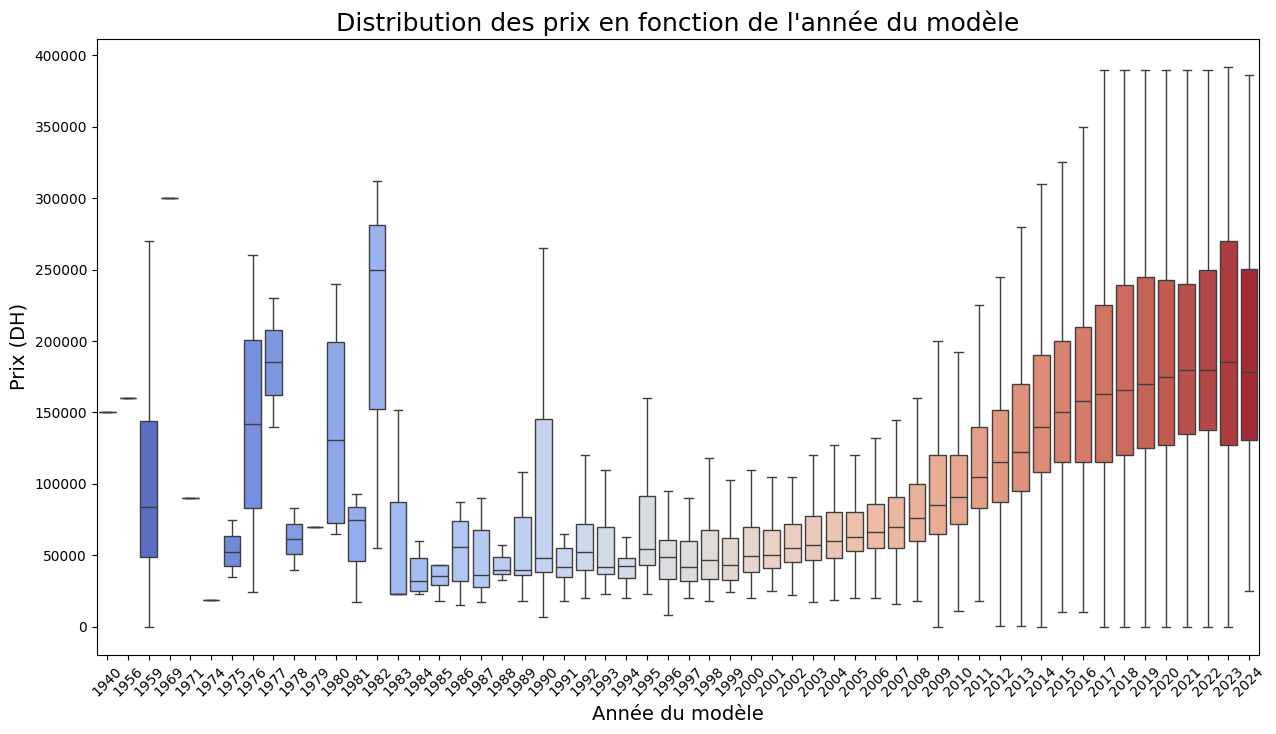

In [81]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Box plot pour les prix en fonction de l'année
sns.boxplot(x='Année', y='price', data=df, showfliers=False, palette="coolwarm")

# Labels et titre
plt.xlabel("Année du modèle", fontsize=14)
plt.ylabel("Prix (DH)", fontsize=14)
plt.title("Distribution des prix en fonction de l'année du modèle", fontsize=18)

# Rotation des labels de l'axe x pour lisibilité
plt.xticks(rotation=45)
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_27596\3203337457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


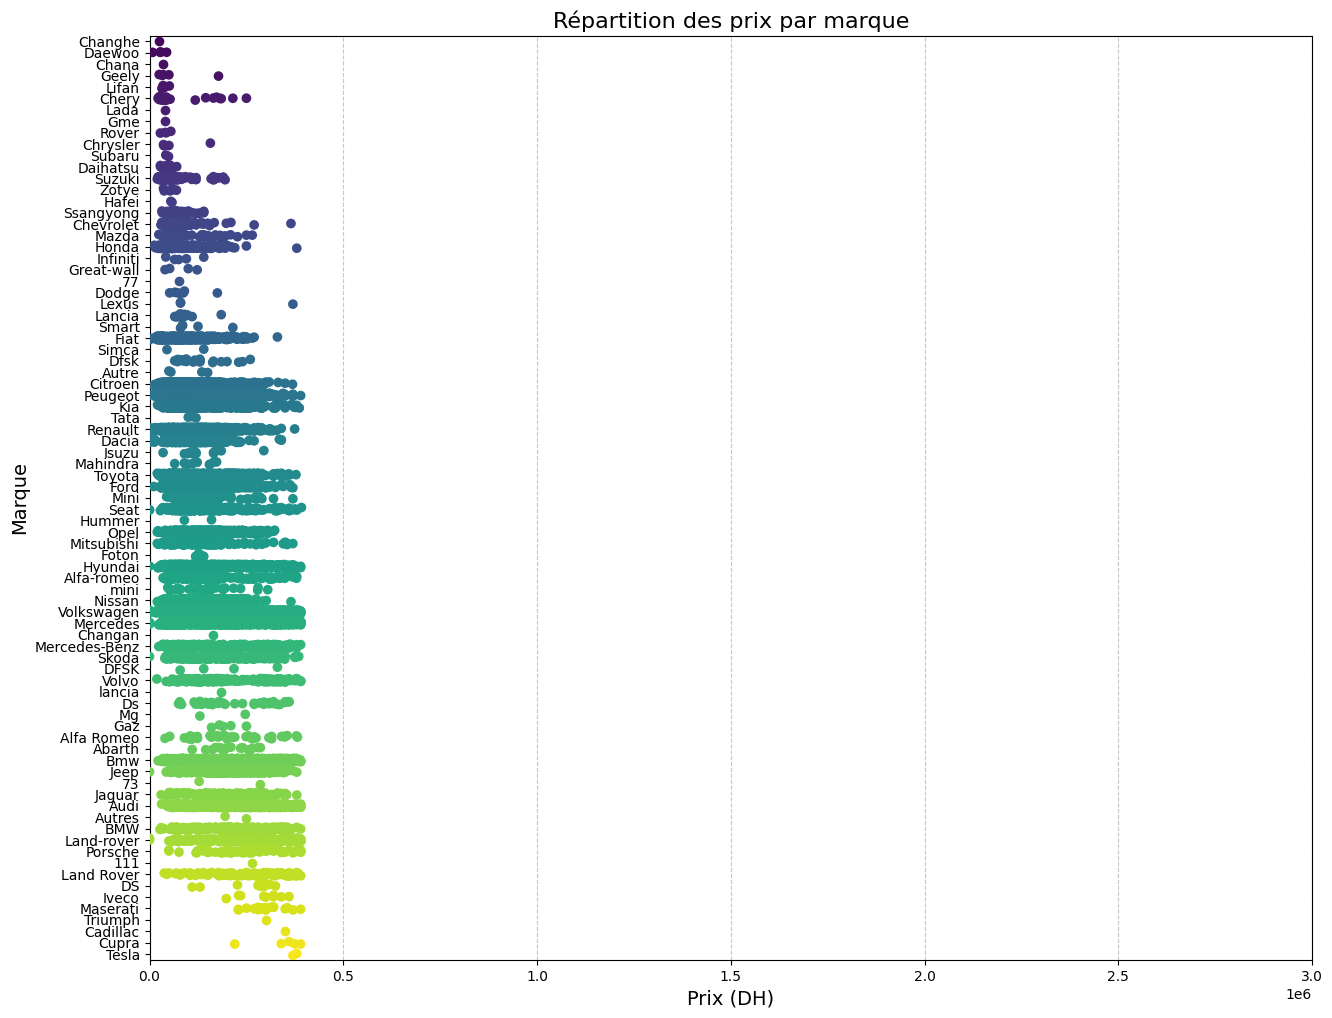

In [82]:
order = df.groupby('marque')['price'].median().sort_values().index
# Création du graphique
f, ax = plt.subplots(figsize=(15, 12))
plt.xlim(0, 3000000)

# Utilisation de stripplot avec des améliorations
sns.stripplot(
    data=df,
    x='price',
    y='marque',
    jitter=0.15,  # Réduire le jitter pour éviter un chevauchement excessif
    size=7,  # Ajuster la taille des points pour plus de clarté
    palette="viridis",  # Palette de couleurs pour un visuel esthétique
    order=order  # Trier les marques par ordre de médiane des prix
)

# Ajout des labels et du titre
plt.xlabel("Prix (DH)", fontsize=14)
plt.ylabel("Marque", fontsize=14)
plt.title("Répartition des prix par marque", fontsize=16)

# Affichage des grilles pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()

C:\Users\HA\AppData\Local\Temp\ipykernel_27596\3596408748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\HA\AppData\Local\Temp\ipykernel_27596\3596408748.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
C:\Users\HA\AppData\Local\Temp\ipykernel_27596\3596408748.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


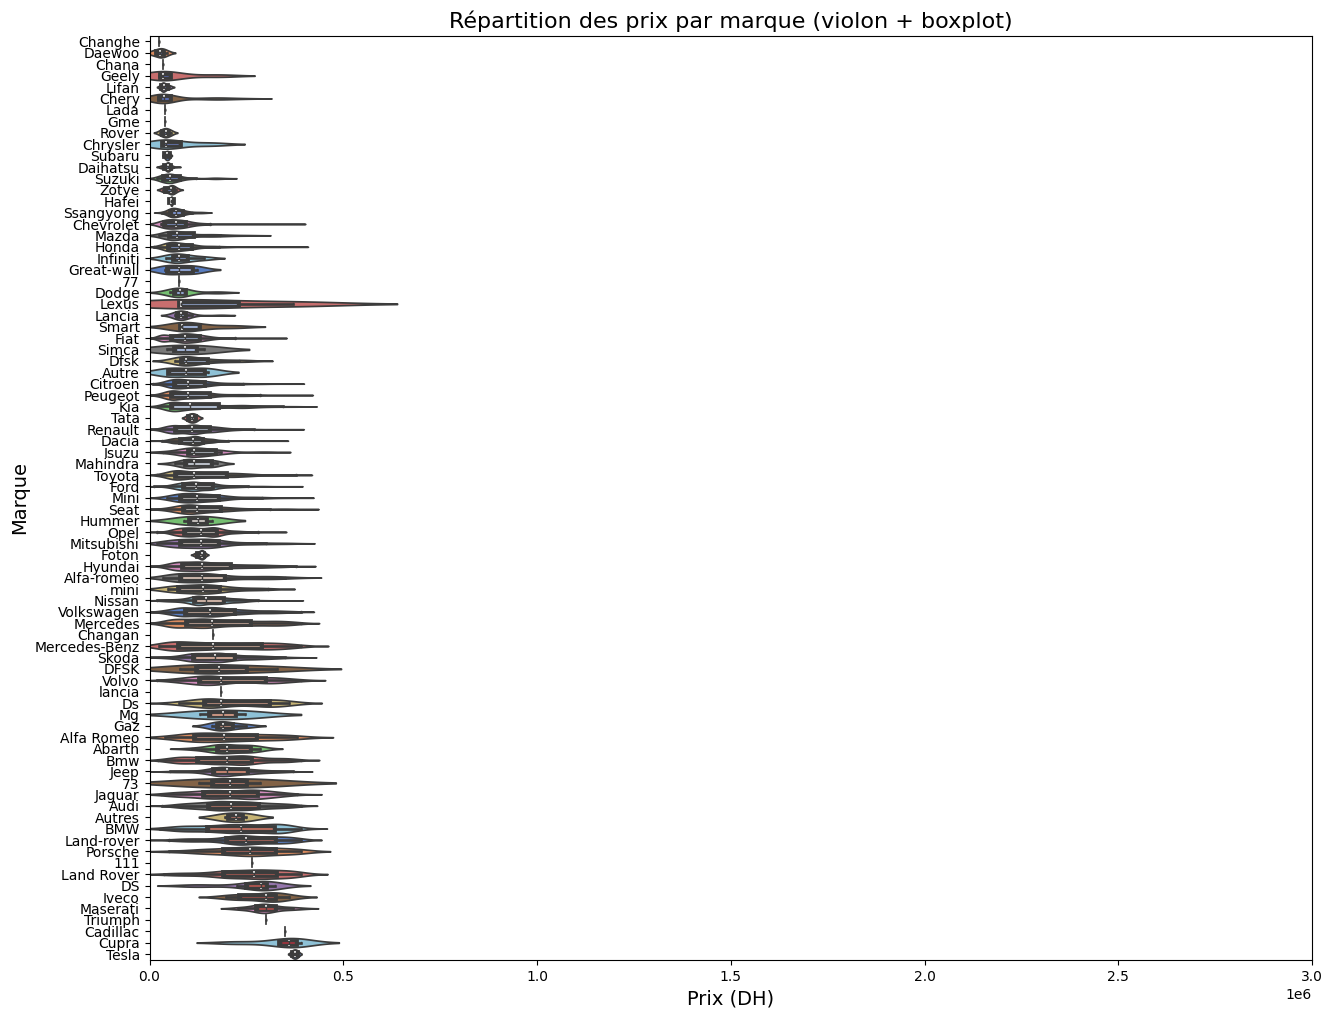

In [83]:
order = df.groupby('marque')['price'].median().sort_values().index

# Taille de la figure
plt.figure(figsize=(15, 12))

# Graphique en violon
sns.violinplot(
    data=df,
    x='price',
    y='marque',
    scale='width',  # Ajuster la largeur en fonction de la densité
    palette="muted",
    order=order  # Trier les marques
)

# Ajouter le boxplot pour la médiane et les quartiles
sns.boxplot(
    data=df,
    x='price',
    y='marque',
    width=0.2,  # Réduire la largeur du boxplot
    palette="coolwarm",
    order=order,
    showfliers=False  # Cacher les valeurs aberrantes pour éviter trop de surcharge
)

# Ajouter des labels et un titre
plt.xlabel("Prix (DH)", fontsize=14)
plt.ylabel("Marque", fontsize=14)
plt.title("Répartition des prix par marque (violon + boxplot)", fontsize=16)

# Limiter la plage des prix
plt.xlim(0, 3000000)

# Afficher le graphique
plt.show()

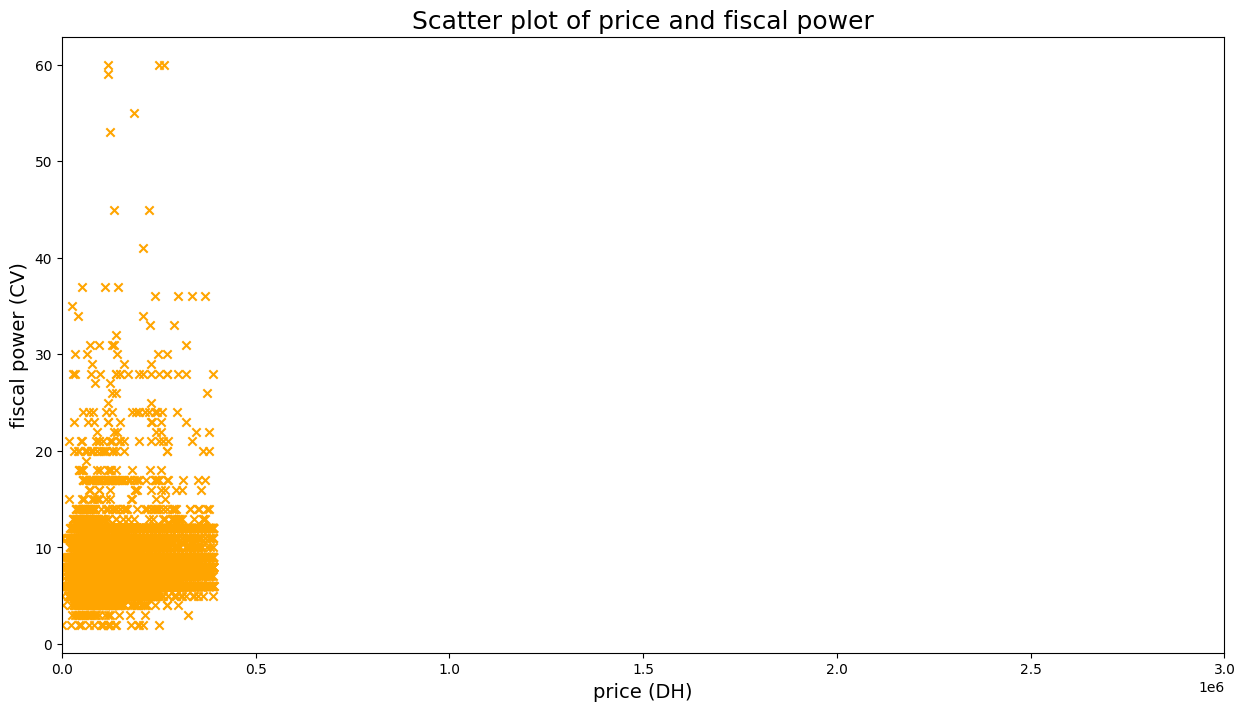

In [84]:
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.price, df["Puissance fiscale"], c='orange', marker='x')
plt.xlim(0, 3000000)
plt.xlabel("price (DH)", fontsize=14)
plt.ylabel("fiscal power (CV)", fontsize=14)
plt.title("Scatter plot of price and fiscal power",fontsize=18)
plt.show()

In [85]:
print('The length of unique marks feature is',len(df.marque.unique()))

The length of unique marks feature is 81


In [86]:
df.marque.value_counts().nlargest(20)

marque
Volkswagen    2796
Renault       2284
Peugeot       1743
Dacia         1618
Ford          1524
Hyundai       1415
Mercedes      1240
Fiat          1085
Audi           900
Citroen        875
Bmw            740
Opel           696
Toyota         665
Kia            609
Nissan         566
Seat           409
Skoda          371
Jeep           369
Land-rover     339
Honda          317
Name: count, dtype: int64

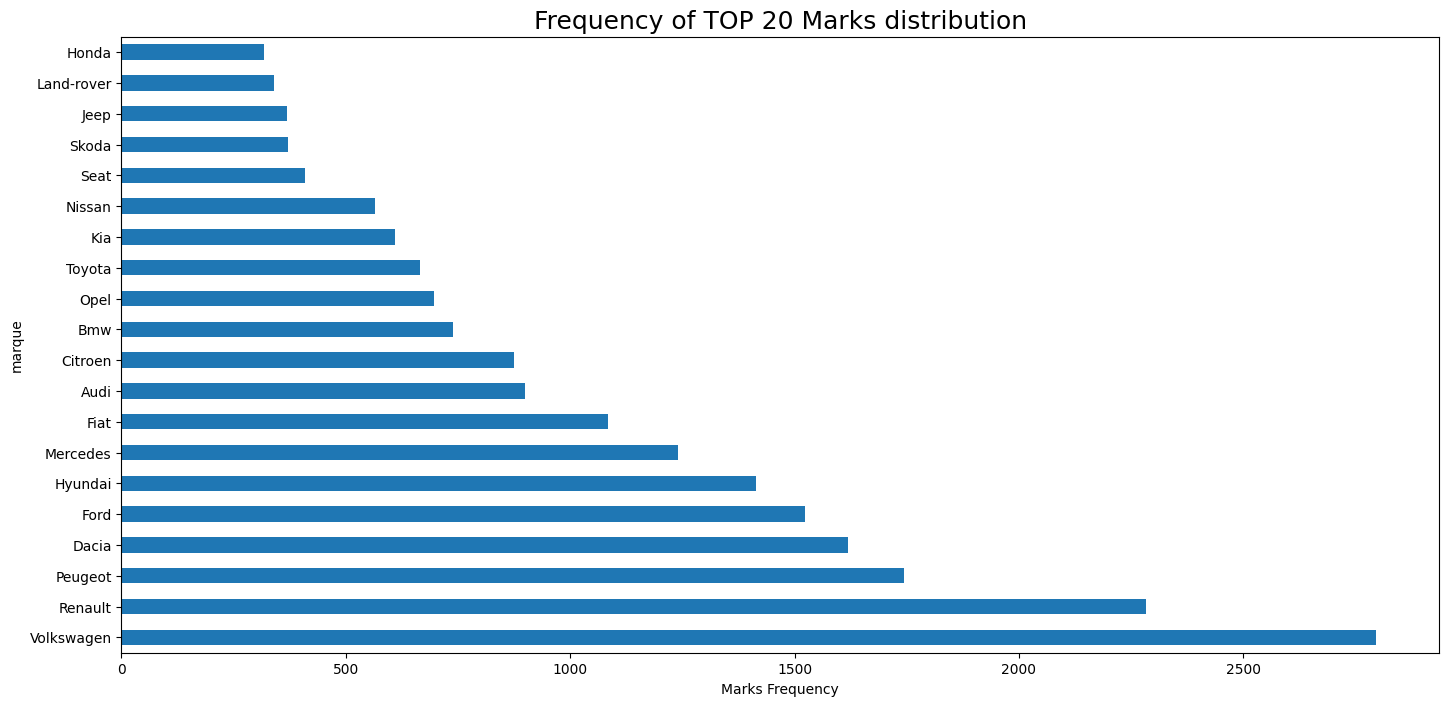

In [87]:
plt.figure(figsize=(17,8))
df.marque.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

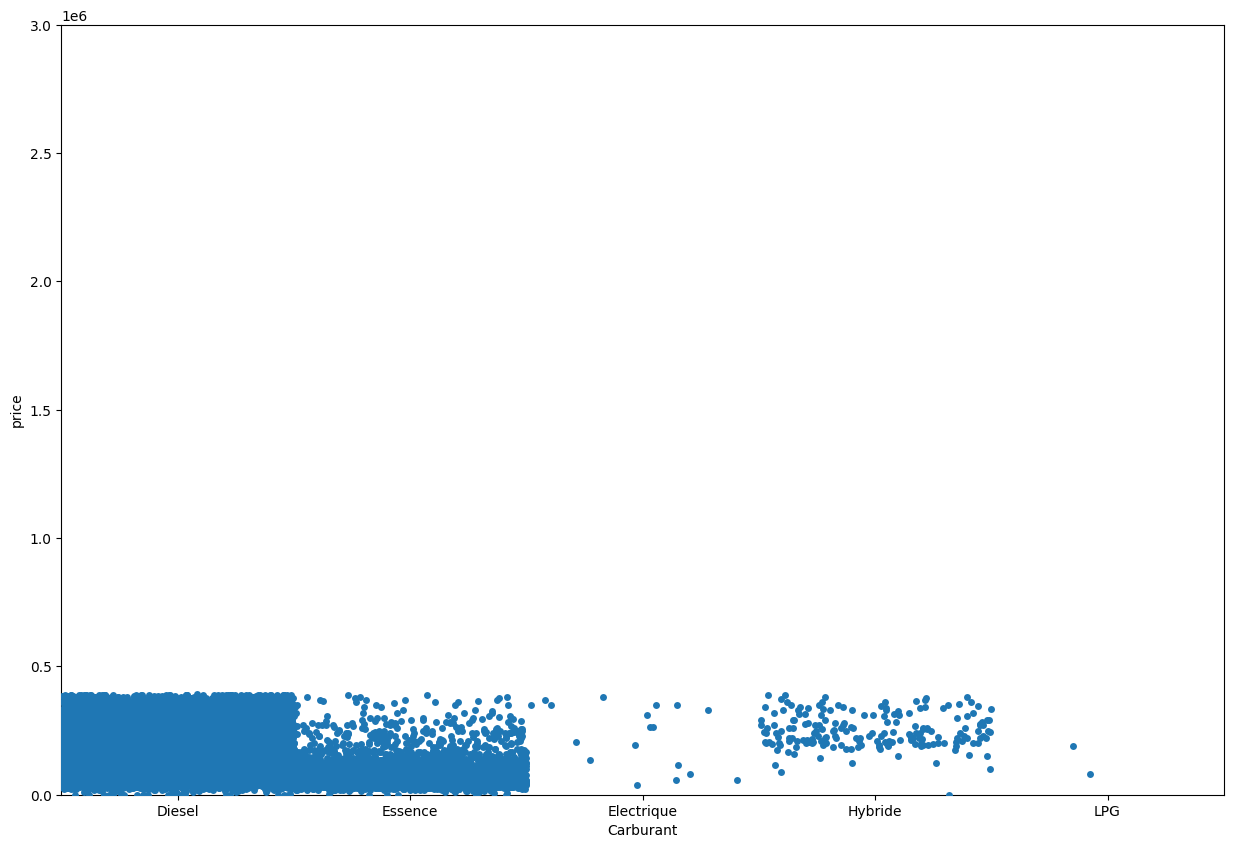

In [88]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Carburant', y='price', jitter=.5)
plt.ylim(0, 3000000)
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [90]:
df['marque'].unique()

array(['Opel', 'Mercedes', 'Volvo', 'Mini', 'Ford', 'Hyundai', 'Nissan',
       'Land-rover', 'Jeep', 'Volkswagen', 'Peugeot', 'Ds', 'Dacia',
       'Skoda', 'Audi', 'Fiat', 'Citroen', 'Bmw', 'Kia', 'Chery',
       'Renault', 'Toyota', 'Seat', 'Mitsubishi', 'Abarth', 'Ssangyong',
       'Suzuki', 'Alfa-romeo', 'Mazda', 'Honda', 'Zotye', 'Jaguar',
       'Chevrolet', 'Lancia', 'Cupra', 'Changan', 'Gaz', 'Porsche',
       'Smart', 'Autre', 'Mahindra', 'Dfsk', 'Geely', 'Tata', 'Maserati',
       'Foton', 'Infiniti', 'Isuzu', 'Daihatsu', 'Mg', 'Chrysler',
       'Dodge', 'Subaru', 'Great-wall', 'Lifan', 'Simca', 'Hafei',
       'Iveco', 'Lada', 'Lexus', 'Gme', 'Daewoo', 'Rover', 'Cadillac',
       'Hummer', 'Triumph', 'Chana', 'Mercedes-Benz', 'Land Rover', 'BMW',
       'mini', 'Alfa Romeo', 'DS', 'DFSK', 'lancia', 'Autres', '73',
       'Tesla', '77', 'Changhe', '111'], dtype=object)

In [123]:
X = df[['Année', 'Kilométrage', 'Puissance fiscale', 'Carburant', 'marque', 'modèle']]
Y=df.price
X = pd.get_dummies(data=X,dtype=int)
X

Année  Kilométrage  Puissance fiscale  Carburant_Diesel  \
0       2009     249000.0                  7                 1   
1       2016     169000.0                  9                 1   
2       2011     140000.0                  6                 1   
3       2016      49000.0                  7                 0   
5       2014     210000.0                  6                 1   
...      ...          ...                ...               ...   
24316   2009      67499.5                  6                 1   
24317   2020      67499.5                  8                 1   
24318   2016     184999.5                  6                 1   
24319   2013     194999.5                  6                 1   
24320   2015     154999.5                  6                 1   

       Carburant_Electrique  Carburant_Essence  Carburant_Hybride  \
0                         0                  0                  0   
1                         0                  0                  0   
2                         0                  0                  0   
3                         0                  1                  0   
5                         0                  0                  0   
...                     ...                ...                ...   
24316                     0                  0                  0   
24317                     0                  0                  0   
24318                     0                  0                  0   
24319                     0                  0                  0   
24320                     0                  0                  0   

       Carburant_LPG  marque_111  marque_73  marque_77  marque_Abarth  \
0                  0           0          0          0              0   
1                  0           0          0          0              0   
2                  0           0          0          0              0   
3                  0           0          0          0              0   
5                  0           0          0          0              0   
...              ...         ...        ...        ...            ...   
24316              0           0          0          0              0   
24317              0           0          0          0              0   
24318              0           0          0          0              0   
24319              0           0          0          0              0   
24320              0           0          0          0              0   

       marque_Alfa Romeo  marque_Alfa-romeo  marque_Audi  marque_Autre  \
0                      0                  0            0             0   
1                      0                  0            0             0   
2                      0                  0            0             0   
3                      0                  0            0             0   
5                      0                  0            0             0   
...                  ...                ...          ...           ...   
24316                  0                  0            0             0   
24317                  0                  0            0             0   
24318                  0                  0            0             0   
24319                  0                  0            0             0   
24320                  0                  0            0             0   

       marque_Autres  marque_BMW  marque_Bmw  marque_Cadillac  marque_Chana  \
0                  0           0           0                0             0   
1                  0           0           0                0             0   
2                  0           0           0                0             0   
3                  0           0           0                0             0   
5                  0           0           0                0             0   
...              ...         ...         ...              ...           ...   
24316              0           0           0                0     

In [92]:
X.columns

Index(['Année', 'Kilométrage', 'Puissance fiscale', 'Carburant_Diesel',
       'Carburant_Electrique', 'Carburant_Essence', 'Carburant_Hybride',
       'Carburant_LPG', 'marque_111', 'marque_73',
       ...
       'modèle_sq5', 'modèle_t-roc', 'modèle_tarraco', 'modèle_thema',
       'modèle_tipo_hatchback', 'modèle_tonale', 'modèle_tourneo_connect',
       'modèle_v60', 'modèle_x6m', 'modèle_xenon'],
      dtype='object', length=938)

In [93]:
columns_list = X.columns.tolist()
print(columns_list)

['Année', 'Kilométrage', 'Puissance fiscale', 'Carburant_Diesel', 'Carburant_Electrique', 'Carburant_Essence', 'Carburant_Hybride', 'Carburant_LPG', 'marque_111', 'marque_73', 'marque_77', 'marque_Abarth', 'marque_Alfa Romeo', 'marque_Alfa-romeo', 'marque_Audi', 'marque_Autre', 'marque_Autres', 'marque_BMW', 'marque_Bmw', 'marque_Cadillac', 'marque_Chana', 'marque_Changan', 'marque_Changhe', 'marque_Chery', 'marque_Chevrolet', 'marque_Chrysler', 'marque_Citroen', 'marque_Cupra', 'marque_DFSK', 'marque_DS', 'marque_Dacia', 'marque_Daewoo', 'marque_Daihatsu', 'marque_Dfsk', 'marque_Dodge', 'marque_Ds', 'marque_Fiat', 'marque_Ford', 'marque_Foton', 'marque_Gaz', 'marque_Geely', 'marque_Gme', 'marque_Great-wall', 'marque_Hafei', 'marque_Honda', 'marque_Hummer', 'marque_Hyundai', 'marque_Infiniti', 'marque_Isuzu', 'marque_Iveco', 'marque_Jaguar', 'marque_Jeep', 'marque_Kia', 'marque_Lada', 'marque_Lancia', 'marque_Land Rover', 'marque_Land-rover', 'marque_Lexus', 'marque_Lifan', 'marque_Mah

In [94]:
df['Carburant'].unique()

array(['Diesel', 'Essence', 'Electrique', 'Hybride', 'LPG'], dtype=object)

In [95]:
pd.set_option('display.max_columns', None)
X.columns

Index(['Année', 'Kilométrage', 'Puissance fiscale', 'Carburant_Diesel',
       'Carburant_Electrique', 'Carburant_Essence', 'Carburant_Hybride',
       'Carburant_LPG', 'marque_111', 'marque_73',
       ...
       'modèle_sq5', 'modèle_t-roc', 'modèle_tarraco', 'modèle_thema',
       'modèle_tipo_hatchback', 'modèle_tonale', 'modèle_tourneo_connect',
       'modèle_v60', 'modèle_x6m', 'modèle_xenon'],
      dtype='object', length=938)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

C:\Users\HA\AppData\Local\Temp\ipykernel_27596\413683510.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


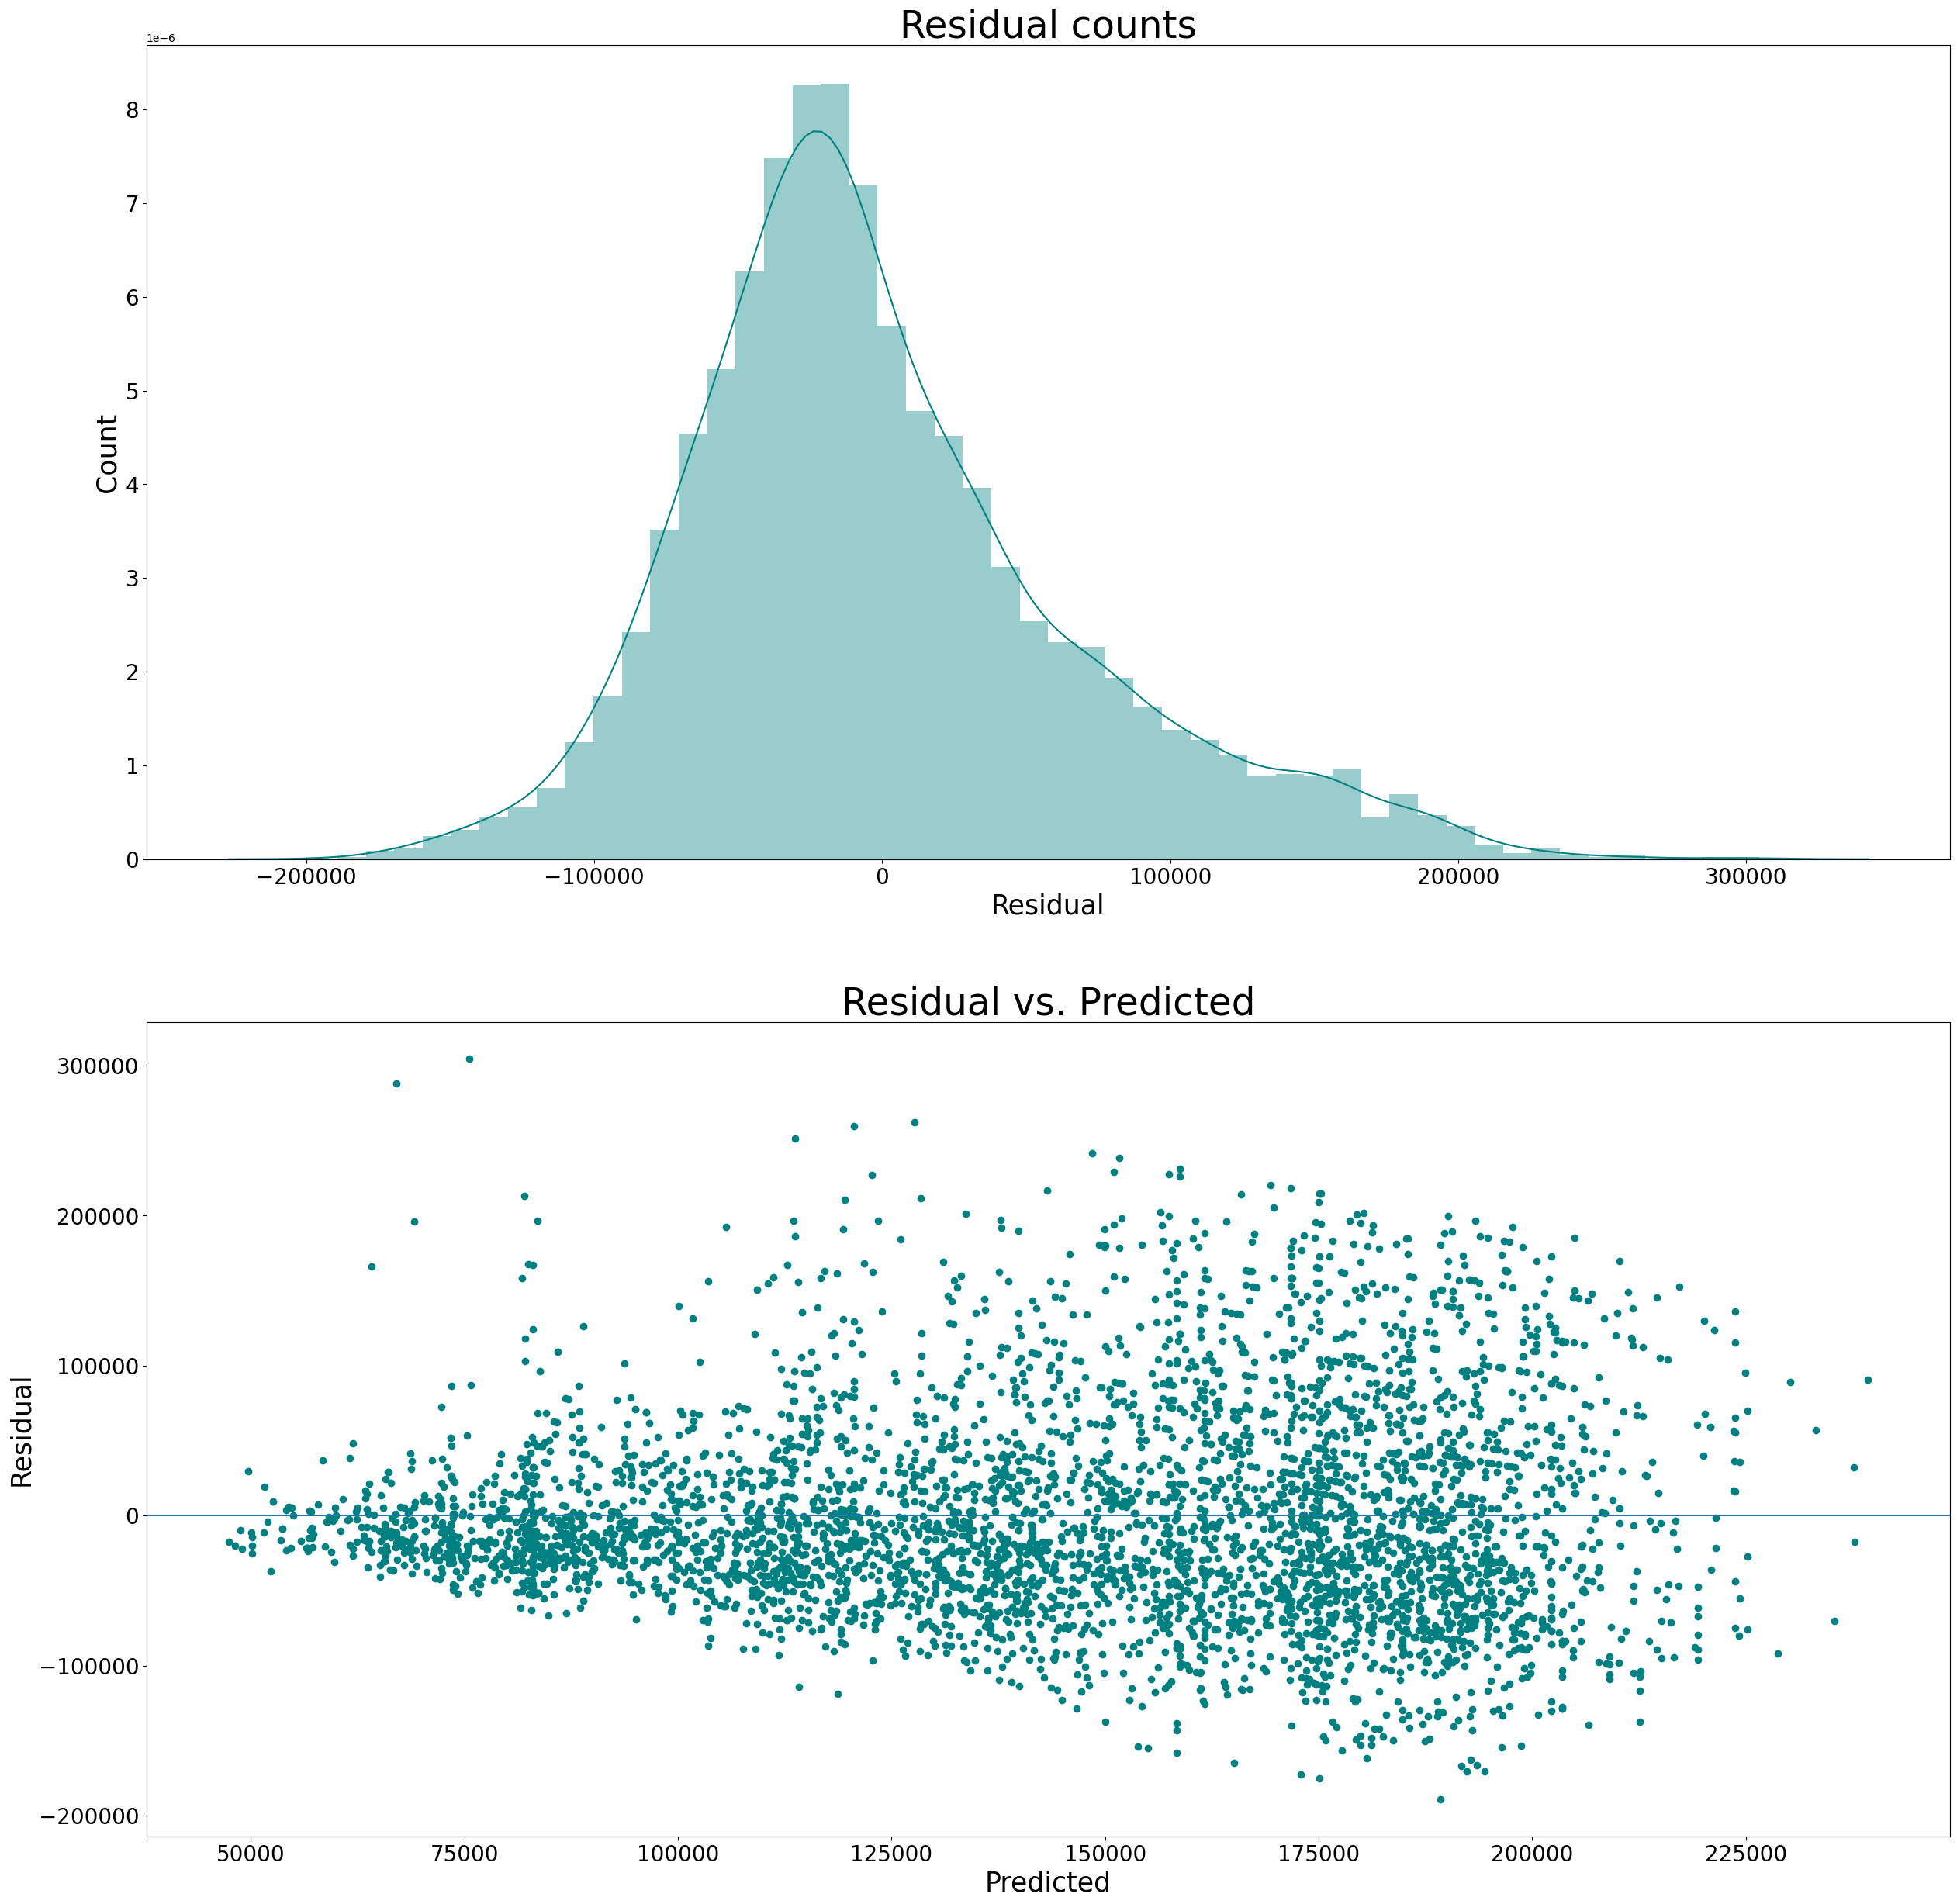

RMSE:
68010.46487608028
Variance score: 0.29


In [97]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=70)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

In [98]:
rmse_l = []
num = []
for n in range(10, 50):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

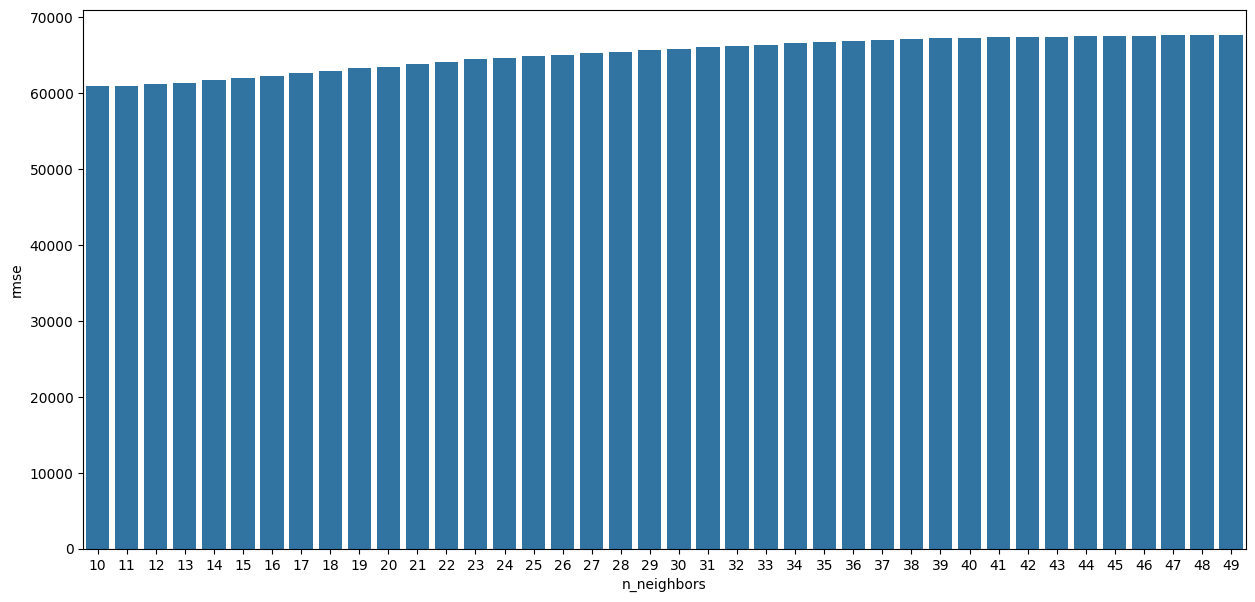

In [99]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()


Evaluating GradientBoostingRegressor...


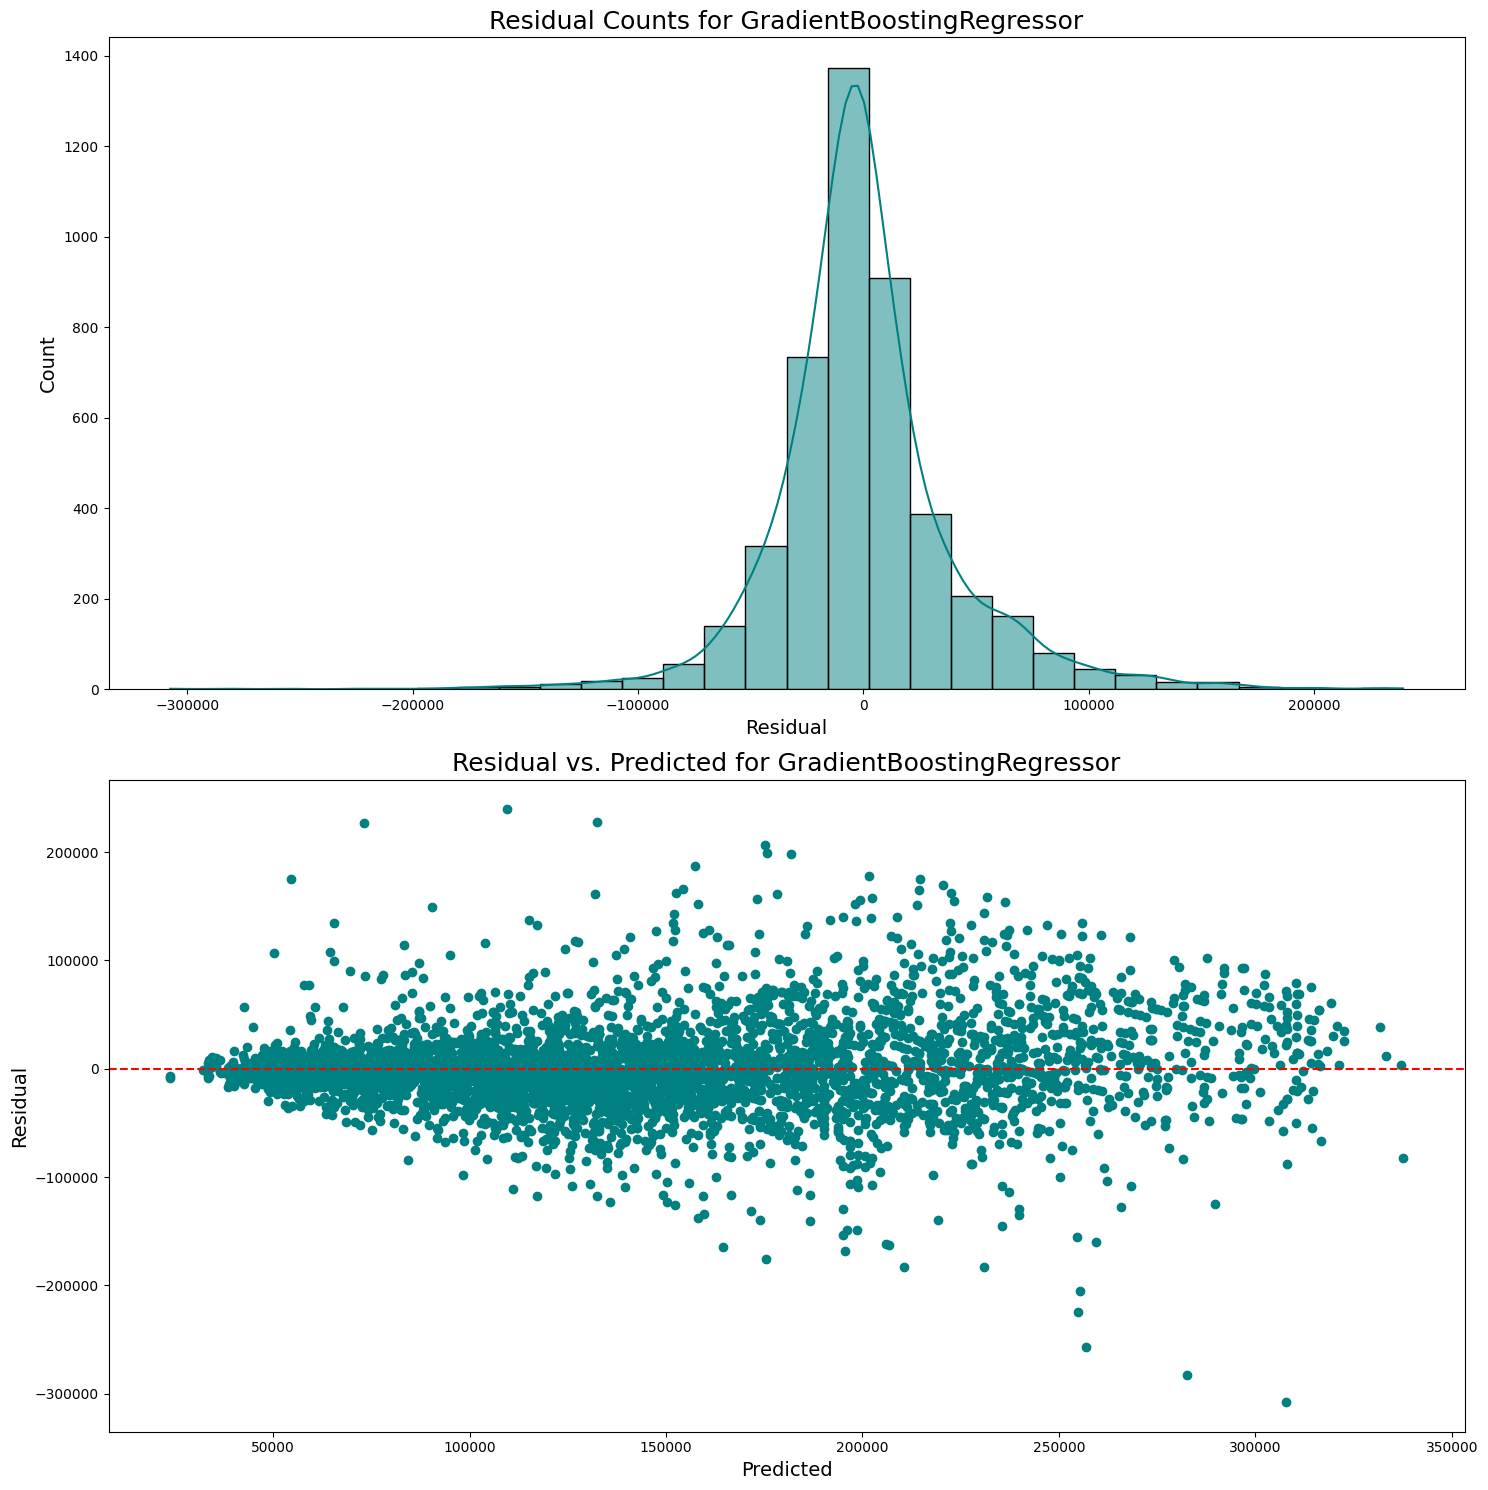


Cross Validation Scores:
[0.7825029  0.79544986 0.82272945 0.83841185 0.84272774 0.81204392
 0.84001411 0.83159458 0.83149918 0.6909808  0.32391187 0.30007684]

Mean Cross Validation Score:
0.7259952594754099

Root Mean Squared Error (RMSE):
40693.28628276962

R² Score:
0.7448336553016126

Evaluating RandomForestRegressor...


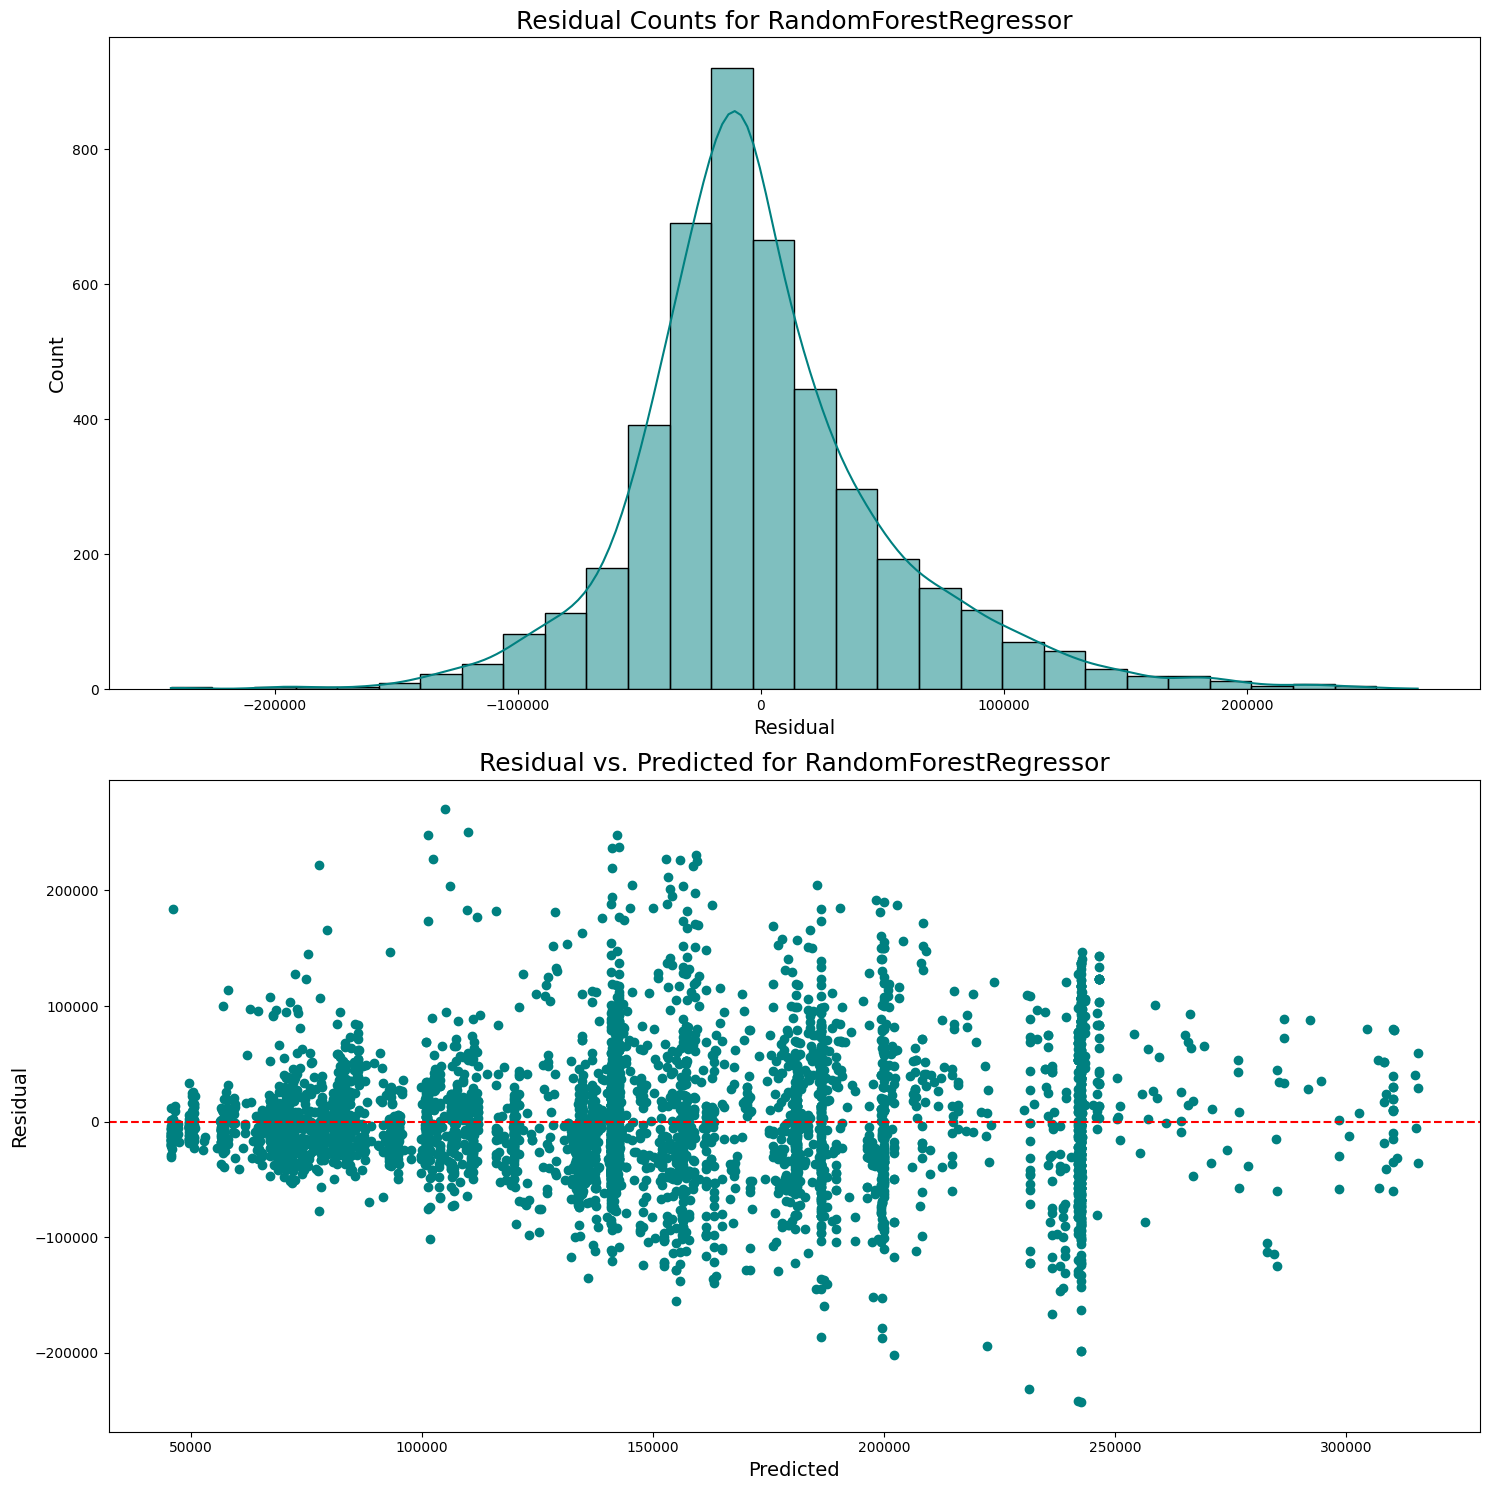


Cross Validation Scores:
[ 0.60956855  0.64854658  0.66573706  0.68112446  0.69915256  0.65129047
  0.70278102  0.70455324  0.67527677  0.44616977 -0.11112952 -0.13668177]

Mean Cross Validation Score:
0.5196990997327097

Root Mean Squared Error (RMSE):
53794.10041310173

R² Score:
0.5540900498435544

Evaluating AdaBoostRegressor...


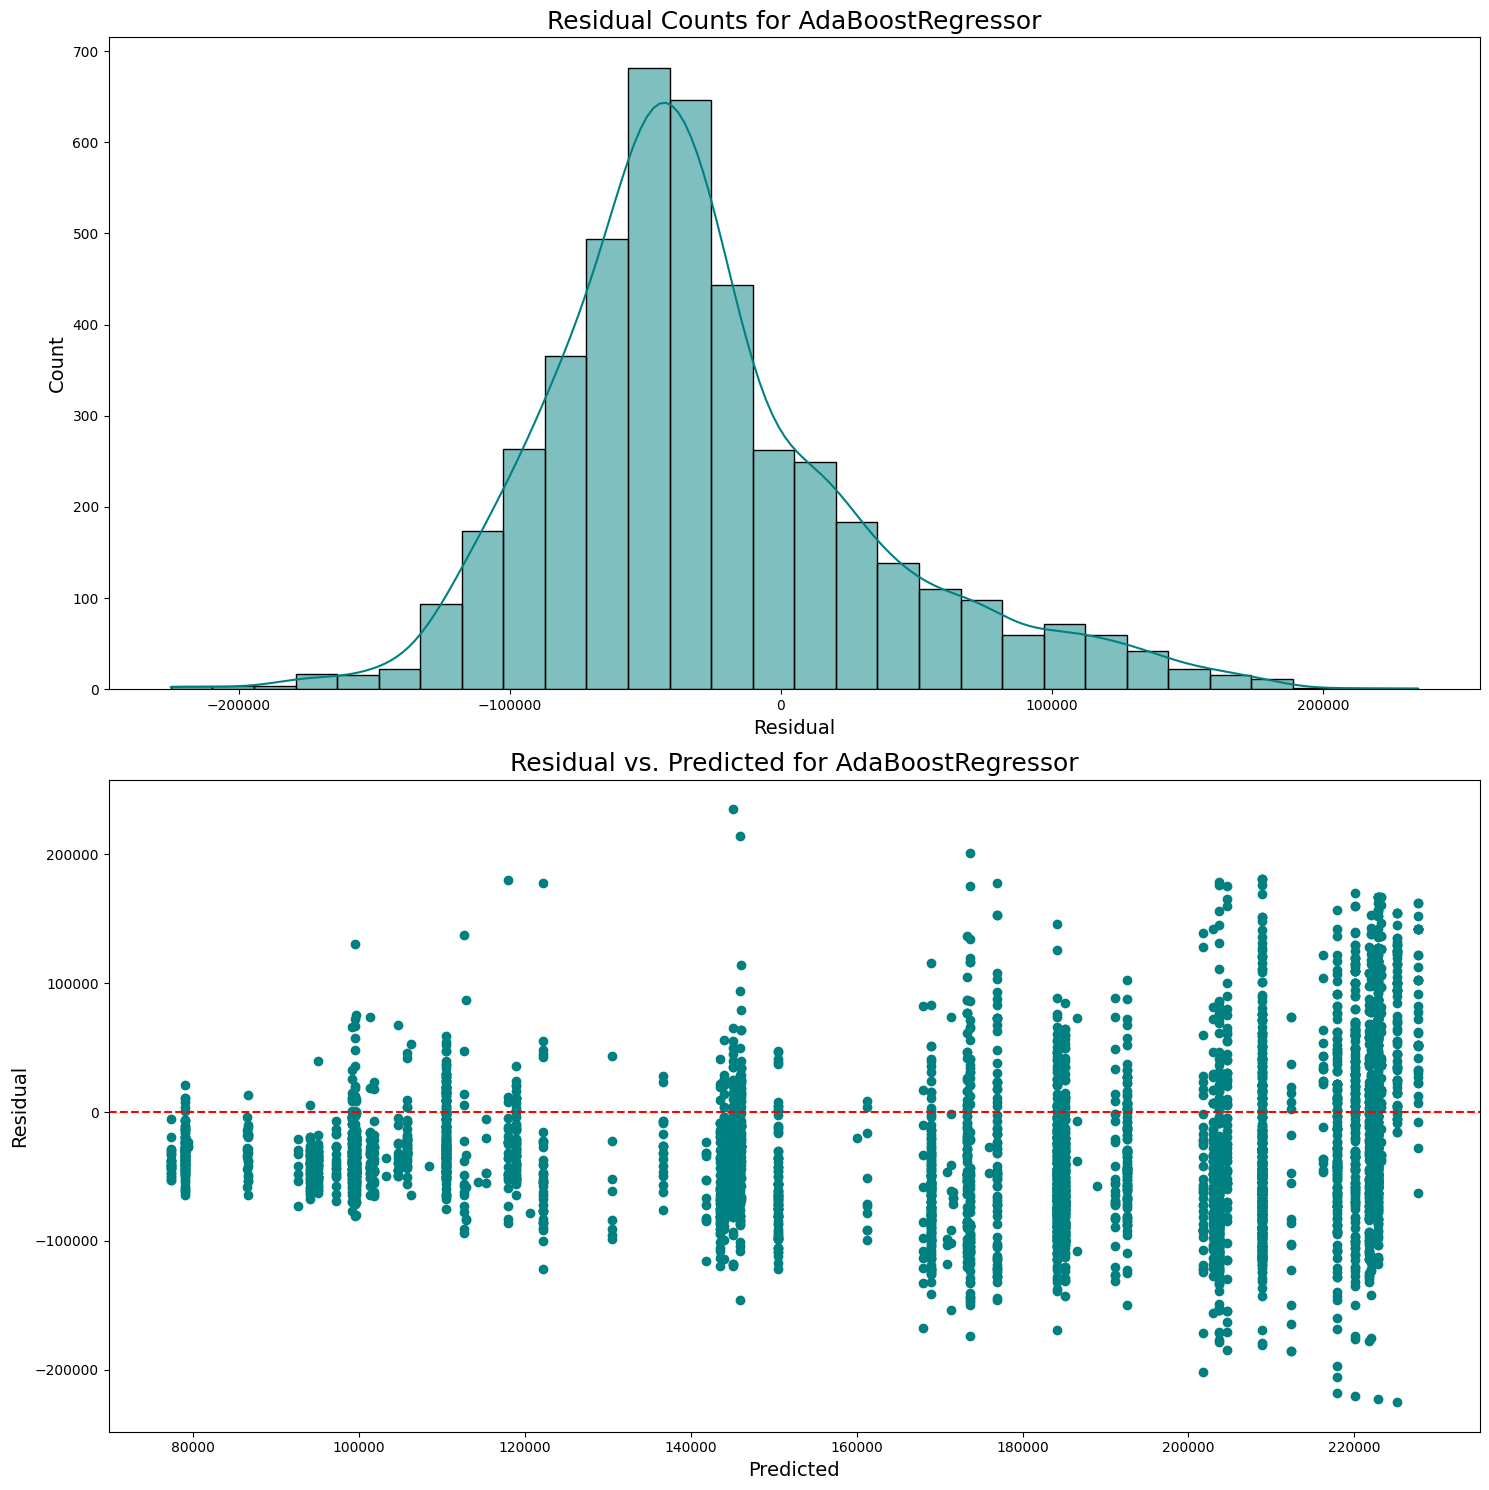


Cross Validation Scores:
[ 0.45968369  0.43512488  0.38727132  0.27475156  0.41693562  0.32776885
  0.43993287  0.34108079  0.30109003  0.35257422 -0.00143425 -0.26273975]

Mean Cross Validation Score:
0.2893366526494241

Root Mean Squared Error (RMSE):
66539.3781820625

R² Score:
0.317762887035292


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

# Example dataset (replace with your own)
from sklearn.datasets import fetch_california_housing
#data = fetch_california_housing()
#X = data.data
#Y = data.target

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(loss='squared_error', max_depth=6),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Loop through models and evaluate
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    residual = Y_test - predicted
    r2 = r2_score(Y_test, predicted)

    # Visualization of residuals
    fig = plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(211)
    sns.histplot(residual, kde=True, color='teal', bins=30)
    plt.title(f'Residual Counts for {name}', fontsize=18)
    plt.xlabel('Residual', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    ax2 = plt.subplot(212)
    plt.scatter(predicted, residual, color='teal')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual vs. Predicted for {name}', fontsize=18)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

    # Performance Metrics
    rmse = np.sqrt(mean_squared_error(Y_test, predicted))
    scores = cross_val_score(model, X, Y, cv=12)

    print('\nCross Validation Scores:')
    print(scores)
    print('\nMean Cross Validation Score:')
    print(scores.mean())
    print('\nRoot Mean Squared Error (RMSE):')
    print(rmse)
    print('\nR² Score:')
    print(r2)


Evaluating Linear Regression...


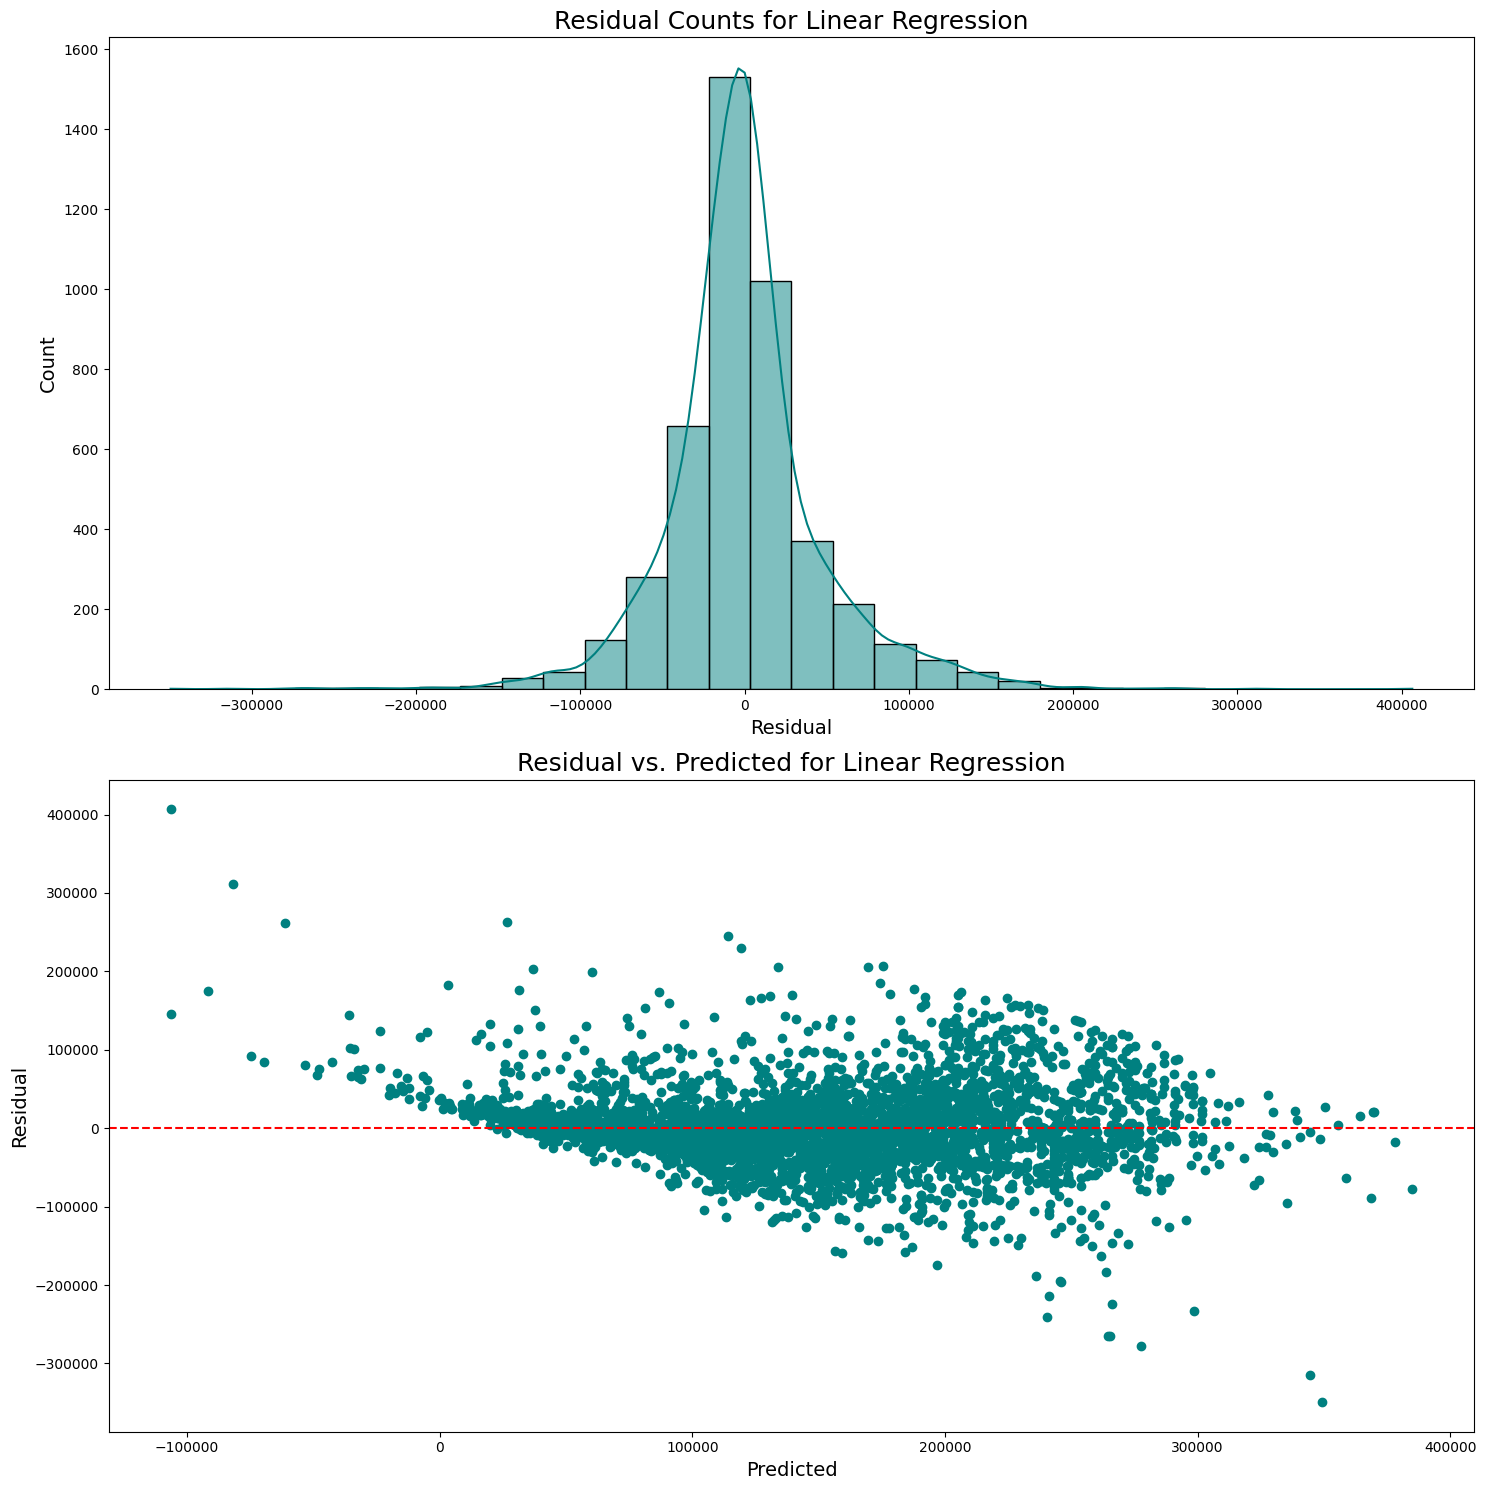


Cross Validation Scores:
[0.69529715 0.68999232 0.74736469 0.7435995  0.74585392 0.69980736
 0.75451665 0.72164133 0.75920889 0.62865017 0.22036263 0.14531197]

Mean Cross Validation Score:
0.6293005492614469

Root Mean Squared Error (RMSE):
48275.544090918695

R² Score
0.6408860968418412


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression





# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

print(f"\nEvaluating Linear Regression...")

# Train the model
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
residual = Y_test - predicted
r2 = r2_score(Y_test, predicted)

# Visualization of residuals
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(211)
sns.histplot(residual, kde=True, color='teal', bins=30)
plt.title(f'Residual Counts for Linear Regression', fontsize=18)
plt.xlabel('Residual', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color='teal')
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residual vs. Predicted for Linear Regression', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()

# Performance Metrics
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(model, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Cross Validation Score:')
print(scores.mean())
print('\nRoot Mean Squared Error (RMSE):')
print(rmse)
print('\nR² Score')

print(r2)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('R2:', r2)



RMSE: 48275.544090918695
R2: 0.6408860968418412


In [102]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('R2:', r2)

RMSE: 39717.48816620535
R2: 0.7569243731151116


In [103]:
from sklearn.ensemble import GradientBoostingRegressor


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('R2:', r2)

RMSE: 45788.17807156065
R2: 0.6769389568232896


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

C:\Users\HA\AppData\Local\Temp\ipykernel_27596\2350263603.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color ='teal')


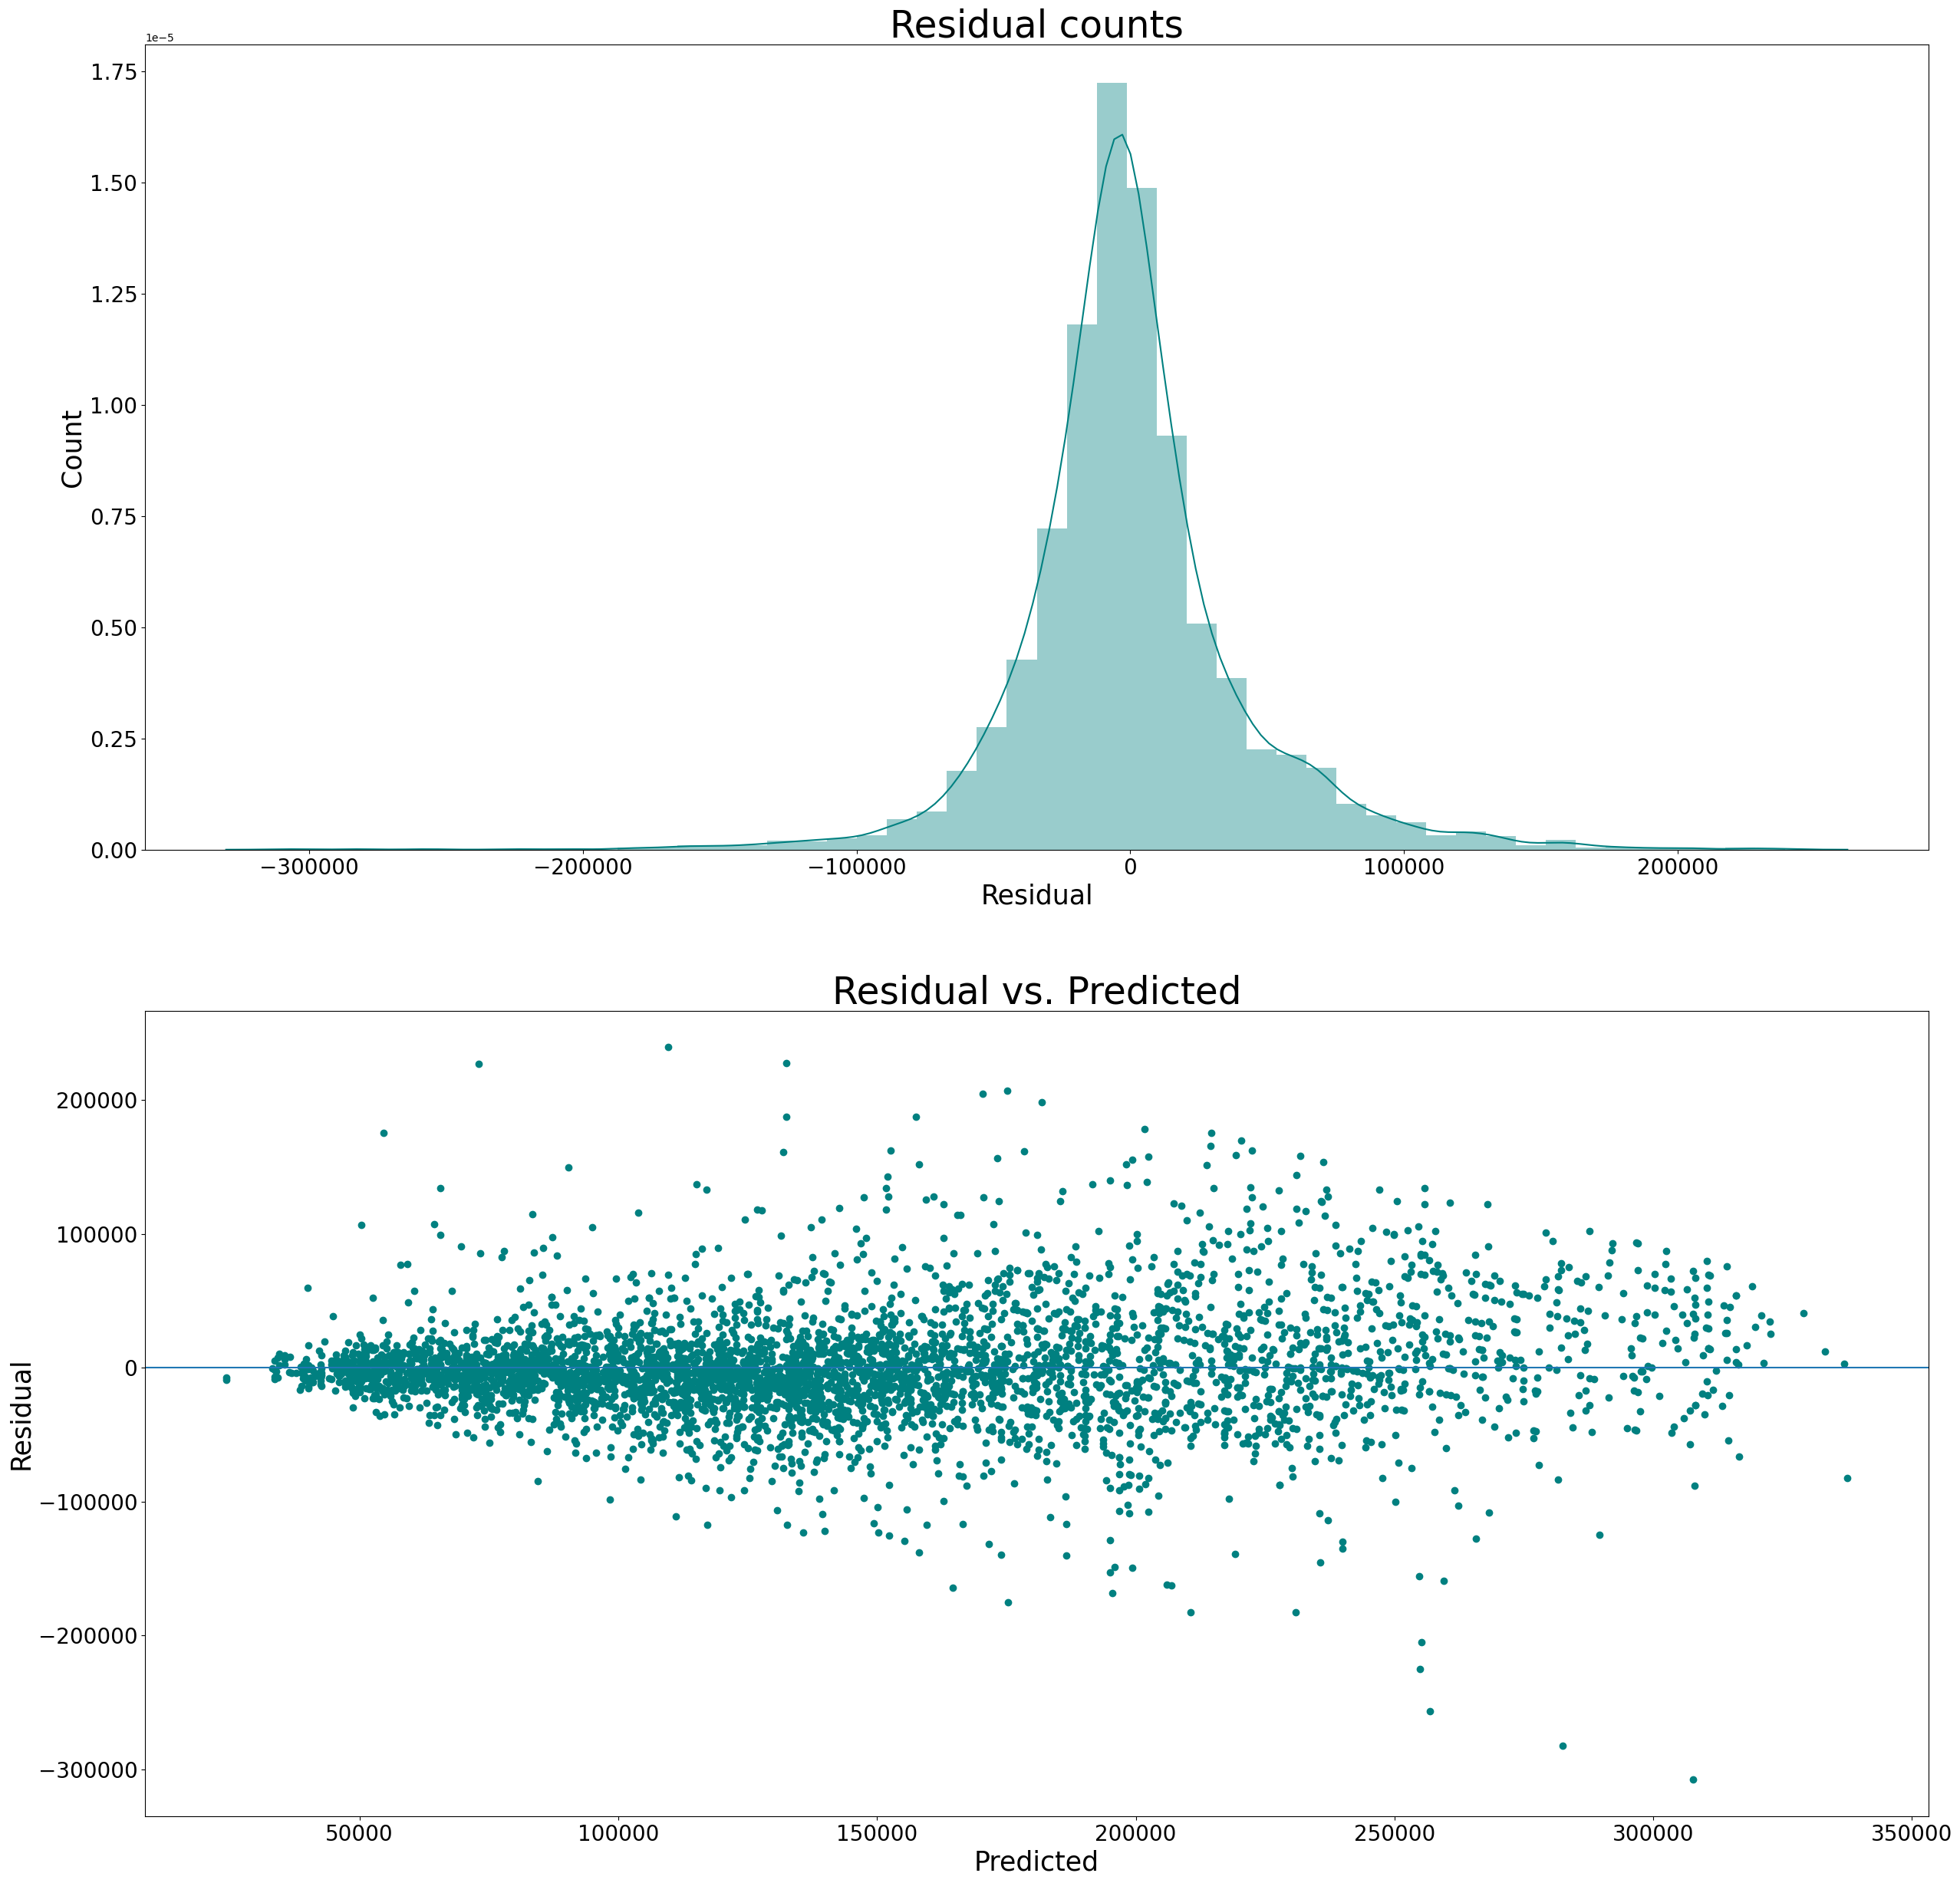


Cross Validation Scores:
[0.78234913 0.79567218 0.82298867 0.83812392 0.84239901 0.81193271
 0.84017031 0.83153899 0.83114476 0.69127513 0.32325858 0.30132967]

Mean Score:
0.7260152553249015

RMSE:
40763.14230022175


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='squared_error', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)


In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='squared_error', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)

In [107]:
Y_test

11641    170000
11907    134000
9251     150000
24198     83000
14351     69000
          ...  
19735    179000
15542    130000
11920    200000
5958      74000
4113     260000
Name: price, Length: 4553, dtype: int64

In [108]:
print(type(Y_test))       # Pour vérifier le type de y_test
print(type(predicted))  

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [109]:
import numpy as np

# Convertir en tableau NumPy avant de redimensionner
A = Y_test.to_numpy().reshape(-1, 1)
B = predicted.reshape(-1, 1)

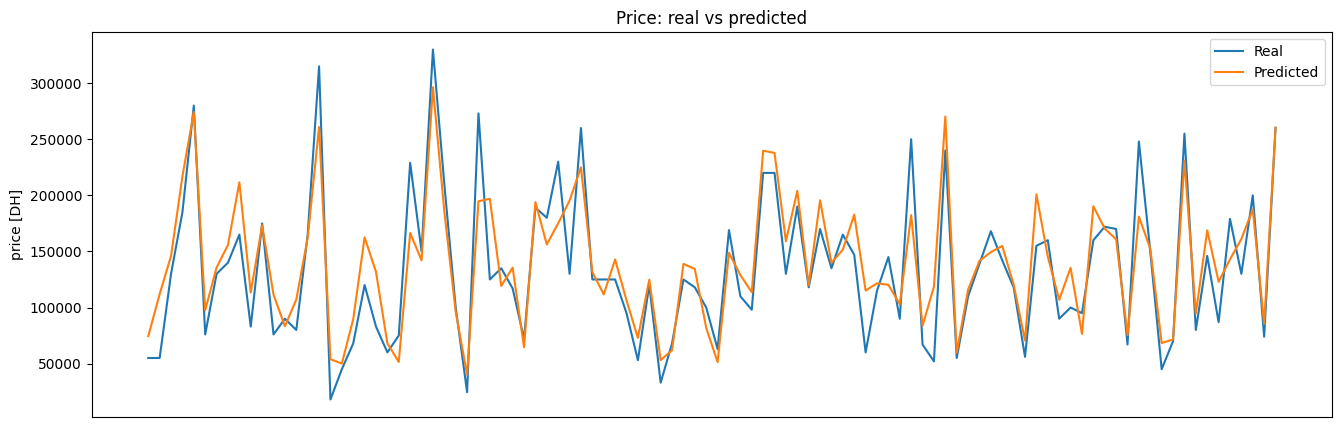

In [110]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price [DH]")
plt.xticks(())
plt.show()


Nous pouvons clairement remarquer que les deux courbes (réelle vs prédite) s'ajustent bien l'une à l'autre, avec quelques petites différences, ce qui nous permet de dire que nous avons réalisé une nette amélioration par rapport au premier modèle.


In [111]:
X_train

Année  Kilométrage  Puissance fiscale  Carburant_Diesel  \
4165    2013        200.0                  6                 1   
10090   2006     199454.0                  5                 1   
15917   2010     182000.0                  6                 1   
14916   2008     191000.0                  8                 1   
19766   2011     144999.5                  6                 1   
...      ...          ...                ...               ...   
12895   2022       5000.0                  6                 1   
23064   2015     164999.5                  6                 1   
5954    2017      48000.0                  6                 1   
986     2001     499978.0                  8                 1   
16902   2011     223000.0                  8                 1   

       Carburant_Electrique  Carburant_Essence  Carburant_Hybride  \
4165                      0                  0                  0   
10090                     0                  0                  0   
15917                     0                  0                  0   
14916                     0                  0                  0   
19766                     0                  0                  0   
...                     ...                ...                ...   
12895                     0                  0                  0   
23064                     0                  0                  0   
5954                      0                  0                  0   
986                       0                  0                  0   
16902                     0                  0                  0   

       Carburant_LPG  marque_111  marque_73  marque_77  marque_Abarth  \
4165               0           0          0          0              0   
10090              0           0          0          0              0   
15917              0           0          0          0              0   
14916              0           0          0          0              0   
19766              0           0          0          0              0   
...              ...         ...        ...        ...            ...   
12895              0           0          0          0              0   
23064              0           0          0          0              0   
5954               0           0          0          0              0   
986                0           0          0          0              0   
16902              0           0          0          0              0   

       marque_Alfa Romeo  marque_Alfa-romeo  marque_Audi  marque_Autre  \
4165                   0                  0            0             0   
10090                  0                  0            0             0   
15917                  0                  0            0             0   
14916                  0                  0            0             0   
19766                  0                  0            0             0   
...                  ...                ...          ...           ...   
12895                  0                  0            0             0   
23064                  0                  0            0             0   
5954                   0                  0            0             0   
986                    0                  0            0             0   
16902                  0                  0            0             0   

       marque_Autres  marque_BMW  marque_Bmw  marque_Cadillac  marque_Chana  \
4165               0           0           0                0             0   
10090              0           0           0                0             0   
15917              0           0           0                0             0   
14916              0           0           0                0             0   
19766              0           0           0                0             0   
...              ...         ...         ...              ...           ...   
12895              0           0           0                0     

In [112]:
X

Année  Kilométrage  Puissance fiscale  Carburant_Diesel  \
0       2009     249000.0                  7                 1   
1       2016     169000.0                  9                 1   
2       2011     140000.0                  6                 1   
3       2016      49000.0                  7                 0   
5       2014     210000.0                  6                 1   
...      ...          ...                ...               ...   
24316   2009      67499.5                  6                 1   
24317   2020      67499.5                  8                 1   
24318   2016     184999.5                  6                 1   
24319   2013     194999.5                  6                 1   
24320   2015     154999.5                  6                 1   

       Carburant_Electrique  Carburant_Essence  Carburant_Hybride  \
0                         0                  0                  0   
1                         0                  0                  0   
2                         0                  0                  0   
3                         0                  1                  0   
5                         0                  0                  0   
...                     ...                ...                ...   
24316                     0                  0                  0   
24317                     0                  0                  0   
24318                     0                  0                  0   
24319                     0                  0                  0   
24320                     0                  0                  0   

       Carburant_LPG  marque_111  marque_73  marque_77  marque_Abarth  \
0                  0           0          0          0              0   
1                  0           0          0          0              0   
2                  0           0          0          0              0   
3                  0           0          0          0              0   
5                  0           0          0          0              0   
...              ...         ...        ...        ...            ...   
24316              0           0          0          0              0   
24317              0           0          0          0              0   
24318              0           0          0          0              0   
24319              0           0          0          0              0   
24320              0           0          0          0              0   

       marque_Alfa Romeo  marque_Alfa-romeo  marque_Audi  marque_Autre  \
0                      0                  0            0             0   
1                      0                  0            0             0   
2                      0                  0            0             0   
3                      0                  0            0             0   
5                      0                  0            0             0   
...                  ...                ...          ...           ...   
24316                  0                  0            0             0   
24317                  0                  0            0             0   
24318                  0                  0            0             0   
24319                  0                  0            0             0   
24320                  0                  0            0             0   

       marque_Autres  marque_BMW  marque_Bmw  marque_Cadillac  marque_Chana  \
0                  0           0           0                0             0   
1                  0           0           0                0             0   
2                  0           0           0                0             0   
3                  0           0           0                0             0   
5                  0           0           0                0             0   
...              ...         ...         ...              ...           ...   
24316              0           0           0                0     

In [113]:
columns = X.columns
modèles_encodées = [col for col in columns if 'modèle' in col]

# Afficher les modèles encodées
print(modèles_encodées)

['modèle_1007', 'modèle_106', 'modèle_107', 'modèle_108', 'modèle_1301', 'modèle_1308 gt', 'modèle_146', 'modèle_147', 'modèle_147 gta', 'modèle_156', 'modèle_159', 'modèle_166', 'modèle_180', 'modèle_19', 'modèle_190', 'modèle_1m', 'modèle_2', 'modèle_2 CV', 'modèle_2 cv', 'modèle_200', 'modèle_2008', 'modèle_205', 'modèle_206', 'modèle_206 CC', 'modèle_206 SW', 'modèle_206 cc', 'modèle_206 sw', 'modèle_206+', 'modèle_207', 'modèle_207 cc', 'modèle_207 sw', 'modèle_207d', 'modèle_208', 'modèle_210', 'modèle_220', 'modèle_230', 'modèle_240', 'modèle_250', 'modèle_270', 'modèle_280', 'modèle_3', 'modèle_300', 'modèle_3008', 'modèle_300c', 'modèle_301', 'modèle_305', 'modèle_306', 'modèle_307', 'modèle_307 SW', 'modèle_307 cc', 'modèle_307 sw', 'modèle_308', 'modèle_309', 'modèle_310d', 'modèle_320', 'modèle_323', 'modèle_370z', 'modèle_400', 'modèle_4007', 'modèle_4008', 'modèle_405', 'modèle_406', 'modèle_407', 'modèle_407 coupe', 'modèle_407 sw', 'modèle_4runner', 'modèle_500', 'modèl

In [114]:
user_input = {'Année':2006, 'Kilométrage':82499.5, 'Puissance fiscale':6, 'Carburant':'Diesel', 'marque':'Dacia'}
user_input['modèle'] = 'Logan'
user_input

{'Année': 2006,
 'Kilométrage': 82499.5,
 'Puissance fiscale': 6,
 'Carburant': 'Diesel',
 'marque': 'Dacia',
 'modèle': 'Logan'}

In [115]:

def input_to_one_hot(data):
    enc_input = np.zeros(938)
    # set the numerical input as they are
    
    
    # Remplir les valeurs numériques
    enc_input[0] = data['Année']
    enc_input[1] = data['Kilométrage']
    enc_input[2] = data['Puissance fiscale']
    
    ##################### Marque #########################
    # Obtenir l'array des marques uniques
    marks = df['marque'].unique()
    # Redéfinir l'entrée utilisateur pour correspondre au format du nom de colonne (i.e., 'mark_X')
    redefinded_user_input = 'marque_' + data['marque']
    # Chercher l'index dans la liste des colonnes
    mark_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[mark_column_index] = 1
    
    ##################### Modèle #########################
    # De la même manière pour le modèle, en supposant que vous avez un encodage unique du modèle comme 'model_X'
    redefinded_user_input = 'modèle_' + data['modèle']
    
    model_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[model_column_index] = 1
    ##################### Carburant ######################
    # Obtenir l'array des types de carburant uniques
    fuel_types = df['Carburant'].unique()
    redefinded_user_input = 'Carburant_' + data['Carburant']
    # Chercher l'index dans la liste des colonnes

    fuelType_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[fuelType_column_index] = 1
    
    
    return enc_input

In [116]:
encoded_input = input_to_one_hot(user_input)

In [117]:
encoded_input

array([2.00600e+03, 8.24995e+04, 6.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [118]:
price_pred = gbr.predict([encoded_input])

c:\Users\HA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [119]:
print(price_pred[0])

122228.58847223333


In [120]:
import joblib

# Sauvegarder le modèle
joblib.dump(gbr, 'model1.pkl')



['model1.pkl']